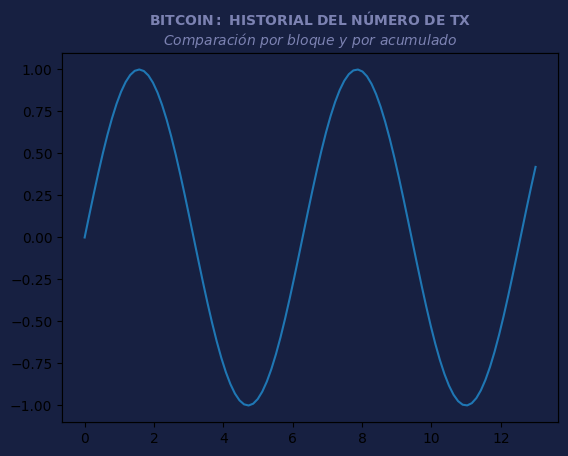

In [11]:
#librerias 


#usar comandos del sistema
import os
#manejo numerico
import numpy as np
#graficar
import matplotlib.pyplot as plt
#libreria manejo de tipografia
from matplotlib import font_manager as fm, rcParams

#cambiar la typografia
fpath = os.path.join(r'MonoLisaSimpson-Regular.ttf')
prop = fm.FontProperties(fname=fpath)
fname = os.path.split(fpath)[1]



# Estilos: ESTAS VARIABLES CONTIENEN ESTILOS
estilo_dark=[(124/255., 130/255., 178/255.), (23/255., 32/255., 65/255.), (23/255., 32/255., 65/255.),] 
# BLANCO , AZUL OSCURO , AZULOSCURO
estilo_dark2=[(237/255., 237/255., 237/255.), (64/255., 64/255., 64/255.), (64/255., 64/255., 64/255.),] 
# BLANCO , NEGRO , NEGRO
estilo_dark3=[(253/255., 253/255., 253/255.), (44/255., 44/255., 44/255.), (254/255., 254/255., 244/255.),] 
# BLANCO , NEGRO , BLANCO
estilo_blanco=[(58/255., 53/255., 59/255.), (255/255., 255/255., 255/255.), (255/255., 255/255., 255/255.),] 
# NEGRO, BLANCO , BLANCO
estilo_blanco2=[(80/255., 82/255., 81/255.), (255/255., 255/255., 255/255.), (255/255., 255/255., 255/255.),]
# NEGRO , BLANCO, BLANCO


#Estilos=[estilo_dark,estilo_blanco]
Estilos=[estilo_dark,estilo_dark2,estilo_dark3,estilo_blanco,estilo_blanco2]

# se tienen variables que contienen los colores del formato
# estilo[0]= Titulos y letras 
# estilo[1] = Fondo principal
# estilo[2] = Fondo imagen




# colores: ESTA VARIABLE CONTIENE COLORES
colores = [(141, 211, 199),(254, 255, 179),(31, 119, 180),] 
#colores = [(206, 213, 231),(144, 177, 237),(191, 176, 205),(109,145,181),(103,133,185)] 
#amarillo, azul claro, azul fuerte,
for i in range(len(colores)):
    r, g, b = colores[i]
    colores[i] = (r / 255., g / 255., b / 255.)



fig, ax = plt.subplots()
########
ax = plt.gca()
#titulo
plt.title(r"$\bf{BITCOIN:\ HISTORIAL\ DEL\ NÚMERO\ DE\ TX}$" "\n" r"$\it{Comparación\ por\ bloque\ y\ por\ acumulado}$",fontsize=10,color=Estilos[0][0],fontproperties=prop)


#Color del fondo
fig.patch.set_facecolor(Estilos[0][1])

#fondo dentro la grafica
plt.axes().patch.set_facecolor(Estilos[0][2])

ax.set_yticks([],[],)
ax.set_xticks([],[],)
###cuadricula
#plt.grid(False, color=colores[2],axis= 'both')


#color: 
#colores de los números
# ax.tick_params(axis='x')
# ax.tick_params(axis='y', colors='gray')
t=np.linspace(0,13,100)
#xt = np.random.randn(100)
xt=np.sin(t)
plt.plot(t,xt,label="disperso",color=colores[2])

plt.show()
#plt.savefig('test.png')
#Las gráficas objetivo 
#1 historial tamaño de bloque
#2 historial numero de transacciones
#3 hash rate 
#4 llegada de bloques

In [ ]:
rgb = (0,0,0)

# trabajo sobre los tiempos


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.dates as mdates
aux = np.load('/home/richard/Escritorio/datos/database.npz', allow_pickle='TRUE')
n_block = aux['n_block']
time_b = aux['time_b']
size = aux['size']
ntx = aux['ntx']
bits = aux['bits']
chainwork = aux['chainwork']
strippedsize = aux['strippedsize']
weight = aux['weight']
total = aux['total']


In [71]:
#F_echas=np.copy(time_b)
print(time_b[3*210000])

2020-05-11


In [2]:


# #crea un arreglo que empieza en 1 sube hasta 798268, sube de 1 en 1 
# #a=np.copy(time_b)
# #c=np.linspace(1,len(time_b),len(time_b))

# #copia el contenido del arreglo time_b
# diferencias=[]

# for i in range(1,len(time_b)):
#     fecha_anterior=datetime.strptime(time_b[i-1], "%Y-%m-%d %H:%M:%S")
#     fecha_actual = datetime.strptime(time_b[i], "%Y-%m-%d %H:%M:%S")
#     diferencia = (fecha_actual - fecha_anterior).total_seconds()
#     diferencias.append(diferencia)
# #se debe optimizar este for para no llamar dos veces al strptime por cada iteración
# print(len(diferencias))
    
# #fig,ax=plt.subplots()
# #crea un objeto graficable del tipo fig
# #ax.scatter(c,diferencias)



In [2]:
fechas=[datetime.strptime(i,"%Y-%m-%d %H:%M:%S") for i in time_b]
#diferencias=[(fechas[i]-fechas(i-1)).total_seconds() for i in range(1,len(fechas)) ]


In [3]:
diferencias=[]
for i in range(1,len(fechas)):
    diferencias.append((fechas[i]-fechas[i-1]).total_seconds())
    
d=np.array(diferencias)
d=d/60

In [4]:
# np.where(d<0,d,0)
# for i in range(0,len(d)):
#    if d[i]<0:
#         print(d[i])
#         print(i)
#  #imprime todos los bloques donde sucede la ANOMALIA

# #print(np.mean(d))
# print(len(c))
# print(len(d))
#fechas=[datetime.strptime(i,"%Y-%m-%d %H:%M:%S") for i in time_b]
# time_b = fechas.date
# num_dates = mdates.date2num(time_b)
# print(len(time_b))
# print(len(num_dates))
time_b = pd.to_datetime(time_b) 


In [5]:
# np.where(d<0,d,0)
# for i in range(0,len(d)):
#    if d[i]<0:
#         #print(d[i])
#         print(i)
# print(len(d))
 #imprime todos los bloques donde sucede la ANOMALIA

In [6]:
A_N=[]
A_N=np.where(d<0,d,0)
# for i,value in enumerate(d):
#     if value<0:
#          A_N.append(value)
# A_N=A_N[:-1]
# print(len(A_N))
#A_N= [elemento for elemento in d if elemento < 0]
print(len(A_N))
print(len(d))


798267
798267


In [7]:
print(time_b[0], type(time_b))
#time_b = np.array(fechas).date
time_b = time_b.date
num_dates = mdates.date2num(time_b)
print(len(time_b),len(num_dates),d)

2009-01-09 02:54:25 <class 'pandas.core.indexes.datetimes.DatetimeIndex'>
798268 798268 [ 1.31666667  7.15       13.58333333 ...  5.61666667 10.9
  2.9       ]


In [1]:
#print(len(d))
#print(len(num_dates))
num_dates=num_dates[:-1]
print(len(num_dates))
print(num_dates[4])

print(type(num_dates))

NameError: name 'num_dates' is not defined

In [122]:
print(num_dates[-1])
print(len(num_dates))

19549.0
798267


In [63]:
print(type(d))
print(type(d[0]))

<class 'numpy.ndarray'>
<class 'numpy.float64'>


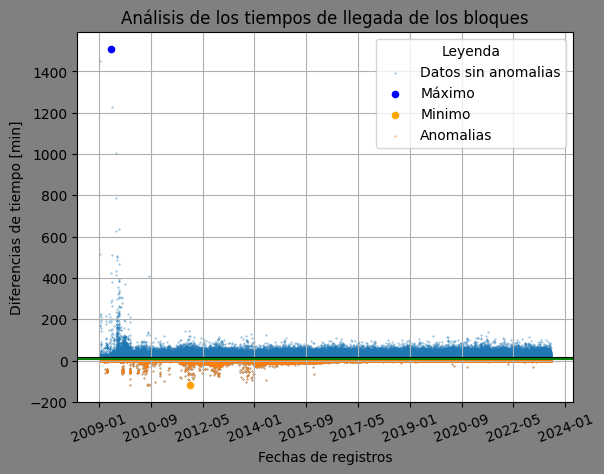

In [9]:
#c = np.linspace(1, len(time_b), len(time_b))
#time_b = time_b.date
#num_dates = mdates.date2num(time_b)

locator = mdates.MonthLocator(interval=20)
formatter = mdates.DateFormatter('%Y-%m')

fig, ax = plt.subplots()

# Configurar los ejes x
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)
ax.xaxis.set_tick_params(labelsize=10, rotation=20)
ax.tick_params(axis='x', colors='black')

# Dibujar las líneas horizontales
ax.axhline(10, color='black')
ax.axhline(np.mean(d), color='g')
#============maximos======
indice=np.where((d==np.max(d)))[0][0]
d_max=d[indice]
#============minimos=====
indice2=np.where((d==np.min(d)))[0][0]
d_min=d[indice2]

# Dibujar los puntos
ax.scatter(num_dates, d,label="Datos sin anomalias", s=0.1,alpha=0.8)
ax.scatter(num_dates[indice], d_max, color ='blue',label='Máximo', s=20)
ax.scatter(num_dates[indice2], d_min, color ='orange',label='Minimo', s=20)
#=========anomalias=======
ax.scatter(num_dates[:len(A_N)],A_N,label="Anomalias",s=0.1)

#Color del fondo dentro la grafica
fig.set_facecolor('gray')

#color del fondo
ax.patch.set_facecolor('white')
#===== LEYENDA===
#scatter.legend_elements(prop="sizes", num=1)[0][0].set_markersize(10)
#legend_elements=[plt.Line2D([0],[0],marker='o',markersize=10,linewidth=2)]
#ax.legend(handles=legend_elements)
###
ax.set_title("Análisis de los tiempos de llegada de los bloques")
ax.set_xlabel("Fechas de registros")
ax.set_ylabel("Diferencias de tiempo [min]")
#cuadricula
ax.grid(True)
ax.legend(loc='upper right',title='Leyenda')   

In [65]:
print(len(num_dates))
print(num_dates[15670])

798267
14390.0


In [10]:
Y1=num_dates[:15672]
X1=d[:15672]
Y2=num_dates[15672:16991]
X2=d[15672:16991]
Y3=num_dates[18393:]
X3=d[18393:]
print(len(Y3))
print(len(X3))

779874
779874


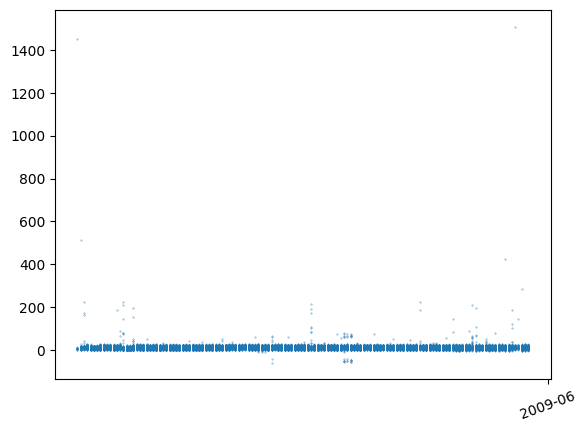

In [27]:
from matplotlib.widgets import SpanSelector
locator = mdates.MonthLocator(interval=5)
formatter = mdates.DateFormatter('%Y-%m')

fig, lexx = plt.subplots()
#==================
def onselect(xmin, xmax):
     print(xmin,xmax)
     return xmin, xmax
span=SpanSelector(lexx,onselect,'horizontal',props=dict(alpha=0.5, facecolor='red'))
#==================
# Configurar los ejes x
lexx.xaxis.set_major_locator(locator)
lexx.xaxis.set_major_formatter(formatter)
lexx.xaxis.set_tick_params(labelsize=10, rotation=20)
lexx.tick_params(axis='x', colors='black')

# Dibujar las líneas horizontales
#lexx.axhline(10, color='black')
#lexx.axhline(np.mean(d), color='g')

# Dibujar los puntos
lexx.scatter(Y1, X1,label="Datos sin anomalias", s=0.1,alpha=0.8)
#plt.switch_backend('tkagg')
plt.show()


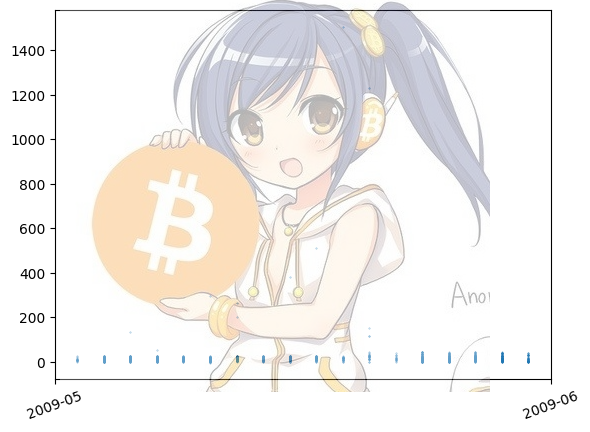

In [62]:
import matplotlib.image as mpimg


locator = mdates.MonthLocator(interval=20)
formatter = mdates.DateFormatter('%Y-%m')
plt.style.use('default')
fig, lexxx = plt.subplots()
#=====INSERTAR IMAGEN
im = mpimg.imread(r'/home/richard/Imágenes/BIT.jpeg')
fig.figimage(im,60,40,alpha=.3)
#=====
# Configurar los ejes x
lexxx.xaxis.set_major_locator(locator)
lexxx.xaxis.set_major_formatter(formatter)
lexxx.xaxis.set_tick_params(labelsize=10, rotation=20)
lexxx.tick_params(axis='x', colors='black')

# Dibujar las líneas horizontales
#lexx.axhline(10, color='black')
#lexx.axhline(np.mean(d), color='g')
# Dibujar los puntos
lexxx.scatter(Y2, X2,label="Datos sin anomalias", s=0.1,alpha=0.8)
plt.show()

In [13]:
#!pip install mplcyberpunk

/tmp/ipykernel_6893/1656754245.py:19: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-dark')


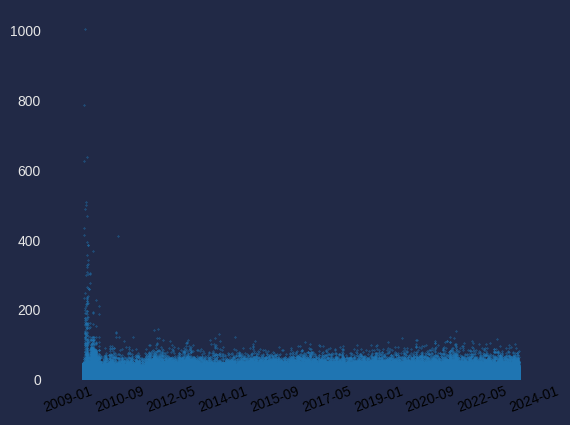

In [64]:
#import mplcyberpunk
#plt.style.use("cyberpunk")
locator = mdates.MonthLocator(interval=20)
formatter = mdates.DateFormatter('%Y-%m')



#lexx=pd.DataFrame({'A':[Y3],'B':[X3]})
fig, lexx = plt.subplots()
lexx.plot(marker='o')
# Configurar los ejes x
lexx.xaxis.set_major_locator(locator)
lexx.xaxis.set_major_formatter(formatter)
lexx.xaxis.set_tick_params(labelsize=10, rotation=20)
lexx.tick_params(axis='x', colors='black')

lexx.scatter(Y3, X3,label="Datos sin anomalias", s=0.1)#,alpha=0.8)
#=====BASE======
plt.style.use('seaborn-dark')
for param in ['figure.facecolor','axes.facecolor','savefig.facecolor']:
    plt.rcParams[param] = '#212946'    #azul oscuro
for param in ['text.color','axes.labelcolor','xtick.color','ytick.color',]:
    plt.rcParams[param]='0.9' #grisclaro


#====COLORES====
COLORES=['#08F7FE','#FE53BB','#F5D300','#00ff41']
lexx.plot(marker='o',ax=ax,color=COLORES)
#====LINEAS====
N_lines = 10
diff_linewidth = 1.05
alpha_value = 0.03
for n in range (1,N_lines+1):
    lexx.plot(marker='o',linewidth=2+(diff_linewidth*n),alpha=alpha_value,legend=False,ax=ax,color=COLORES)
#======COLORES BAJO LAS LINEAS
# for colum, color in zip(lexx,COLORES):
#     lexx.fill_between(x=lexx.index,y1=lexx[colum].vales,y2=[0]*len(lexx),color=COLORES,alpha=0.1)
# lexx.grid(color='#425289')  
#======

lexx.set_xlim([ax.get_xlim()[0] - 0.2,ax.get_xlim()[1]+0.2])
lexx.set_ylim(0)
plt.show()

In [13]:

print(num_dates[7000],type(num_dates))
print(time_b[100])
target_date = pd.to_datetime('2009-01-11')
buscador=target_date.strftime('%Y-%m-%d')
#print(buscador)
#print(target_date)
#Num_indices = np.where(time_b == buscador)[0]
#print(Num_indices)

14313.0 <class 'numpy.ndarray'>
2009-01-11


In [28]:
Correccion=[datetime.strptime(i,"%Y-%m-%d %H:%M:%S") for i in F_echas]


In [32]:
Correccion = pd.to_datetime(Correccion) 
Correccion = Correccion.date

In [36]:
print(Correccion[2])
print(F_echas[2])
print(type(F_echas))
print(type(F_echas[2]))

2009-01-09
2009-01-09 03:02:53
<class 'numpy.ndarray'>
<class 'numpy.str_'>


In [35]:

#target_date = mdates.date2num('2009-01-12')
Num_indices = np.where(Correccion == buscador)[0]
if len(Num_indices) > 0:
    print(f"La fecha se encuentra en la posición {Num_indices[0]} del arreglo num_dates.")
else:
    print("La fecha no se encuentra en el arreglo num_dates.")

La fecha no se encuentra en el arreglo num_dates.


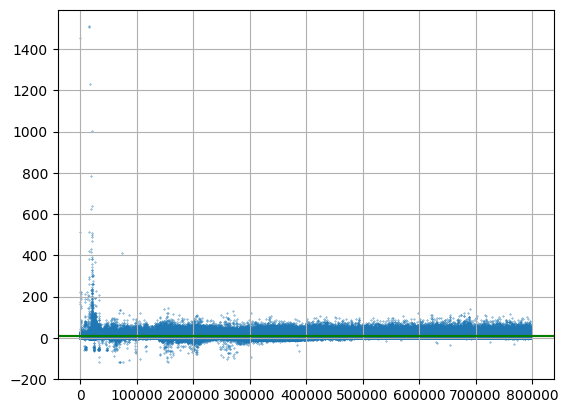

In [43]:

fig,ax=plt.subplots()
#crea un objeto graficable del tipo fig
ax.scatter(c[:len(d)], d, s=0.1)
plt.axhline(10, color='red')
plt.axhline(np.mean(d), color='g')
ax.grid(True)

#crea una grafica de sipersion y toma como eje x al arreglo "c", eje y a "b"


In [56]:
#import matplotlib.dates as mdates
#from datetime import datetime

# Fecha en formato string
fecha_str = "11-05-2020"

# Convertir la fecha string a objeto datetime
fecha_datetime = datetime.strptime(fecha_str, "%d-%m-%Y")

# Convertir el objeto datetime a formato flotante
fecha_float = mdates.date2num(fecha_datetime)

print(fecha_float)


18393.0
